# Playground

## Imports

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import pickle
import numpy as np

## read xls

In [2]:
df = pd.read_excel('omnipath_normal_cytoscape.xlsx')

In [3]:
df

,Source,Uniprot_source,Target,Uniprot_target,link weight (healthy),consensus_direction,consensus_inhibition,consensus_stimulation,link_weight_n_entopt
0,HSPB1,P04792,ACTC1,P68032,1.298498e+19,0,0,0,1.000000e+00
1,ACTC1,P68032,CFL1,P23528,1.040283e+19,1,0,0,8.011429e-01
2,CFL1,P23528,ACTC1,P68032,1.040283e+19,1,1,0,8.011429e-01
3,ACTC1,P68032,ACTN4,O43707,5.104953e+18,1,0,0,3.931429e-01
4,ACTC1,P68032,ACTR2,P61160,2.449906e+18,1,0,0,1.886723e-01
...,...,...,...,...,...,...,...,...,...
5184,MCM6,Q14566,MCM3,P25205,1.066165e+10,1,0,0,8.210753e-10
5185,MCM3,P25205,MCM6,Q14566,1.066165e+10,1,0,0,8.210753e-10
5186,MCM2,P49736,MCM6,Q14566,1.066165e+10,1,0,0,8.210753e-10
5187,MCM6,Q14566,MCM2,P49736,1.066165e+10,1,0,0,8.210753e-10


In [4]:
uj = df[['Source', 'Target', 'link weight (healthy)', 'consensus_direction']]

In [5]:
uj.head()

,Source,Target,link weight (healthy),consensus_direction
0,HSPB1,ACTC1,1.298498e+19,0
1,ACTC1,CFL1,1.040283e+19,1
2,CFL1,ACTC1,1.040283e+19,1
3,ACTC1,ACTN4,5.104953e+18,1
4,ACTC1,ACTR2,2.449906e+18,1


In [6]:
is_zero = uj['consensus_direction'] == 0
ud = uj[is_zero]
ud.head()

,Source,Target,link weight (healthy),consensus_direction
0,HSPB1,ACTC1,1.298498e+19,0
7,HMGB1,TXN,2.233211e+18,0
11,EZR,ACTC1,1.030593e+18,0
12,LDHA,HSPA8,7.641713e+17,0
13,CFL1,TPI1,7.331696e+17,0


In [10]:
ud = ud.rename(columns={'Source': 'Target', 'Target': 'Source'})
új_1 = uj.append(ud)
új_1

,Source,Target,link weight (healthy),consensus_direction
0,HSPB1,ACTC1,1.298498e+19,0
1,ACTC1,CFL1,1.040283e+19,1
2,CFL1,ACTC1,1.040283e+19,1
3,ACTC1,ACTN4,5.104953e+18,1
4,ACTC1,ACTR2,2.449906e+18,1
...,...,...,...,...
5157,ANKLE2,PPP2R2A,3.947018e+11,0
5158,PKN1,MARCKS,3.936154e+11,0
5162,RELA,KPNA2,3.786883e+11,0
5171,TERF2IP,RIF1,1.774216e+11,0


In [5]:
print(uj.shape)
uj_1 = uj.append(ud)
print(uj_1.shape)

(5189, 4)
(6056, 4)


In [7]:
tokeletes = uj_1[['Source', 'Target', 'link weight (healthy)']]
tokeletes.head()
print(len(tokeletes))


is_nan = np.isnan(tokeletes['link weight (healthy)'])
valami = tokeletes[~is_nan]
print(len(valami))

a = np.array(tokeletes['link weight (healthy)'])

6056
6056


In [8]:
MG = nx.MultiDiGraph()
MG = nx.from_pandas_edgelist(tokeletes, source = 'Source', target = 'Target', edge_attr = 'link weight (healthy)')

In [9]:
b = np.histogram(a, 50)

In [10]:
x, y = b

<BarContainer object of 50 artists>

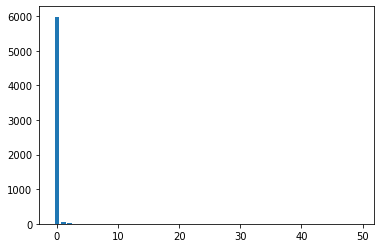

In [11]:
plt.bar(np.arange(0, 50), x)

In [12]:
np.std(a)

3.2078963435638086e+17

In [13]:
np.mean(a)

2.7438167542137184e+16

In [14]:
np.max(a), np.min(a)

(1.29849825e+19, 4595755264.0)

In [15]:
a_norm = a[a > np.mean(a) - 1 * np.std(a)][a < np.mean(a) + 1 * np.std(a)]

In [16]:
np.max(a_norm), np.min(a_norm)

(3.267712947e+17, 4595755264.0)

In [17]:
len(a_norm), len(a)

(6014, 6056)

<BarContainer object of 50 artists>

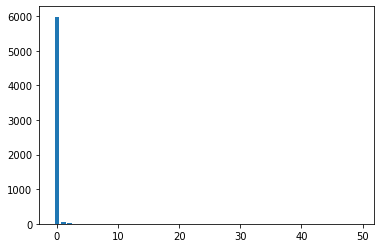

In [18]:
plt.bar(np.arange(0, 50), x)

In [19]:
len(y), len(x)

(51, 50)

(array([4.305e+03, 4.340e+02, 2.500e+02, 1.610e+02, 1.350e+02, 1.080e+02,
        7.500e+01, 8.800e+01, 6.600e+01, 3.900e+01, 4.800e+01, 3.700e+01,
        2.200e+01, 3.600e+01, 1.900e+01, 2.400e+01, 2.100e+01, 1.600e+01,
        5.000e+00, 6.000e+00, 3.000e+00, 7.000e+00, 1.300e+01, 9.000e+00,
        7.000e+00, 1.000e+01, 6.000e+00, 7.000e+00, 4.000e+00, 6.000e+00,
        6.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 4.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 3.000e+00, 2.000e+00, 4.000e+00,
        2.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 4.000e+00, 5.000e+00,
        3.000e+00, 3.000e+00]),
 array([4.59575526e+09, 6.53543040e+15, 1.30708562e+16, 1.96062820e+16,
        2.61417078e+16, 3.26771336e+16, 3.92125594e+16, 4.57479852e+16,
        5.22834110e+16, 5.88188368e+16, 6.53542626e+16, 7.18896884e+16,
        7.84251142e+16, 8.49605400e+16, 9.14959658e+16, 9.80313916e+16,
        1.04566817e+17, 1.11102243e+17, 1.17637669e+17, 1.24173095e+17,
        1.307085

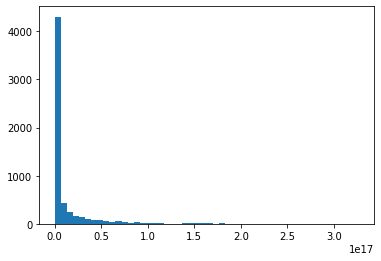

In [20]:
plt.hist(a_norm, 50)

(array([6.023e+03, 1.800e+01, 4.000e+00, 1.000e+00, 0.000e+00, 5.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([4.59575526e+09, 4.32832754e+17, 8.65665504e+17, 1.29849825e+18,
        1.73133100e+18, 2.16416375e+18, 2.59699650e+18, 3.02982925e+18,
        3.46266200e+18, 3.89549475e+18, 4.32832750e+18, 4.76116025e+18,
        5.19399300e+18, 5.62682575e+18, 6.05965850e+18, 6.49249125e+18,
        6.92532400e+18, 7.35815675e+18, 7.79098950e+18, 8.22382225e+18,
        8.65665500e+18, 9.08948775e+18, 9.52232050e+18, 9.95515325e+18,
        1.03879860e+19, 1.08208188e+19, 1.12536515e+19, 1.16864843e+19,
        1.21193170e+19, 1.25521498e+19, 1.29849825e+19]),
 <a list of 30 Patch objects>)

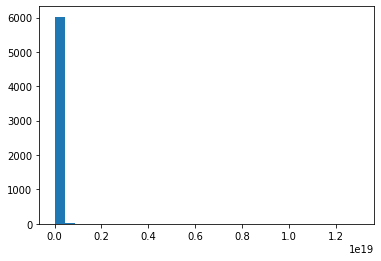

In [21]:
plt.hist(a, 30)

In [22]:
c = [y for x, y, in MG.degree]

(array([1.078e+03, 9.100e+01, 2.300e+01, 6.300e+01, 1.400e+01, 1.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([  1. ,  11.7,  22.4,  33.1,  43.8,  54.5,  65.2,  75.9,  86.6,
         97.3, 108. ]),
 <a list of 10 Patch objects>)

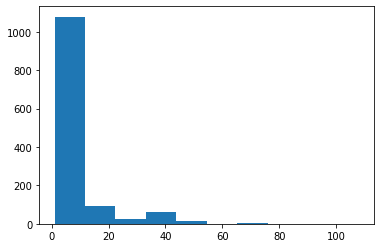

In [115]:
plt.hist(c, 20)

In [116]:
d = nx.edge_betweenness_centrality(MG, normalized = False).values()

In [117]:
d = np.fromiter(d, dtype = float)

In [118]:
d.shape

(4366,)

[]
4363


(array([4.071e+03, 2.290e+02, 3.700e+01, 1.300e+01, 1.000e+01, 2.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([1.00000000e+00, 1.95679852e+03, 3.91259704e+03, 5.86839556e+03,
        7.82419408e+03, 9.77999260e+03, 1.17357911e+04, 1.36915896e+04,
        1.56473882e+04, 1.76031867e+04, 1.95589852e+04]),
 <a list of 10 Patch objects>)

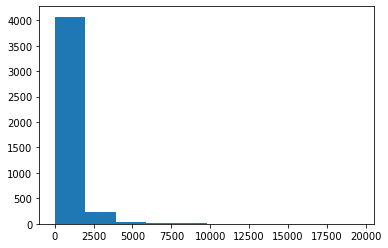

In [119]:
#print(min(d))
#print(max(d))
print(d[d>100_000])
#plt.hist(d)
print(len(d[d<15000]))
plt.hist(d[d < 20000])

In [30]:
invalid_nodes = []
for a_set in a:
    for node in a_set:
        invalid_nodes.append(node)

In [31]:
invalid_nodes

['IDH1',
 'IDH2',
 'TPD52',
 'ANXA6',
 'ETFB',
 'ETFA',
 'SDHB',
 'SDHA',
 'COPA',
 'TMED10',
 'TMED2',
 'COPB2',
 'ERP44',
 'LMAN1',
 'SURF4',
 'TMED5',
 'HNRNPM',
 'CDC5L',
 'PLRG1',
 'PAFAH1B2',
 'PAFAH1B3',
 'PFKM',
 'PFKL',
 'LSM3',
 'LSM2',
 'LSM1',
 'NUDT9',
 'GLOD4',
 'COX7A2',
 'COX6B1',
 'PGRMC1',
 'FECH',
 'ABCB7',
 'IDH3G',
 'IDH3B',
 'IDH3A',
 'SAR1A',
 'PREB',
 'SUCLG1',
 'SUCLG2',
 'UTRN',
 'SNTB2',
 'SEC22B',
 'STX5',
 'SCFD1',
 'ARL1',
 'MOGS',
 'MON2',
 'TRMT10C',
 'HSD17B10',
 'RAB6A',
 'GCC2',
 'PFDN2',
 'PFDN1',
 'UBA5',
 'UFM1',
 'NUCB2',
 'ERAP1',
 'ARFGEF3',
 'PHB2',
 'TIMM44',
 'PAM16',
 'HEXA',
 'HEXB',
 'FARSA',
 'FARSB',
 'ERGIC1',
 'ERGIC2',
 'ERGIC3',
 'DAD1',
 'BCAS2',
 'CEBPZ',
 'COQ6',
 'COQ9',
 'PEX19',
 'ABCD3',
 'SLC25A17',
 'COASY',
 'EDC4',
 'BCS1L',
 'LETM1',
 'NAT10',
 'THUMPD1',
 'SBDS',
 'EFL1',
 'CLPX',
 'CLPP',
 'DIS3',
 'EXOSC8',
 'GGA2',
 'CLINT1',
 'NOP14',
 'EMG1']

In [32]:
for valami in invalid_nodes:
    MG.remove_node(valami)

In [33]:
nx.number_connected_components(MG)

1

In [34]:
nx.average_shortest_path_length(MG)

4.185950419143489

In [36]:
hossz = nx.shortest_path_length(MG, method = 'bellman-ford')

In [37]:
path = []
path = [c for c in hossz]

In [42]:
np.array(path).shape

(1182, 2)

In [60]:
path[99][1].values

<function dict.values>

In [68]:
length = []
for name, l in path:
    for key in l:
        length.append(l[key])

In [72]:
length = np.array(length)

(array([9.91400e+03, 7.60600e+04, 3.42276e+05, 7.75670e+05, 1.26128e+05,
        4.32300e+04, 2.12580e+04, 1.94400e+03, 5.16000e+02, 1.28000e+02]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ]),
 <a list of 10 Patch objects>)

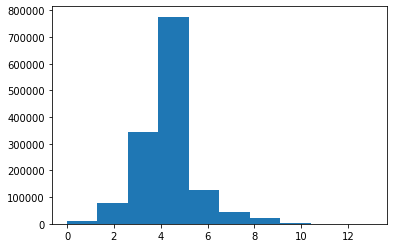

In [73]:
plt.hist(length)

In [2]:
df = pd.read_excel('omnipath_cytoscape.xlsx', sheet_name = 'Sensitive.')

In [4]:
df.head()

,Name_source,Uniprot_source,Name_target,Uniprot_target,Link weight (sensitive),1/Link weight(sensitive,1/Link weight(sensitive) *10000000,Link_weight_s_EntOpt,consensus_direction,consensus_inhibition,consensus_stimulation,Link weight (sensitive).1
0,P09874,PARP1,P62805,HIST1H4L,2.438437e+13,4.100988e-14,4.100988e-07,1.000000,1,0,1,2.438437e+13
1,P07900,HSP90AA1,P10809,HSPD1,2.214851e+13,4.514976e-14,4.514976e-07,0.908308,1,0,1,2.214851e+13
2,P61604,HSPE1,P10809,HSPD1,1.348731e+13,7.414378e-14,7.414378e-07,0.553113,1,1,0,1.348731e+13
3,P04406,GAPDH,P60709,ACTB,1.224016e+13,8.169826e-14,8.169826e-07,0.501968,0,0,0,1.224016e+13
4,P00558,PGK1,P04406,GAPDH,1.179972e+13,8.474774e-14,8.474774e-07,0.483905,0,0,0,1.179972e+13
